In [6]:
import os
%matplotlib inline
Malphigui=0
if Malphigui:
    directory='/home/pdavid/Bureau/Hybrid_2D_beta/Code' #Malpighi
    directory_script='/home/pdavid/Bureau/Hybrid_2D_beta/Figures_and_Tests/off_center_COMSOL'
    csv_directory='/home/pdavid/Bureau/Hybrid_2D_beta/Figures_and_Tests/off_center_COMSOL/csv_outputs'
    directory_article_figures='/home/pdavid/Bureau/Hybrid_2D_beta/Figures_and_Tests/Article_figs'
else: #Auto_58
    directory='/home/pdavid/Bureau/Code/Hybrid_2D_beta/Code/'
    directory_script='/home/pdavid/Bureau/Code/Hybrid_2D_beta/Figures_and_Tests/off_center_COMSOL'
    csv_directory='/home/pdavid/Bureau/Code/Hybrid_2D_beta/Figures_and_Tests/off_center_COMSOL/csv_outputs'
    directory_article_figures='/home/pdavid/Bureau/Code/Hybrid_2D_beta/Figures_and_Tests/Article_figs'
os.chdir(directory)


import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10,10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large', 
         'font.size': 20,
         'lines.linewidth': 4}
pylab.rcParams.update(params)

In [7]:
no_I=pd.read_csv(csv_directory + '/no_interp.csv').to_numpy().reshape(5,5)
I=pd.read_csv(csv_directory + '/interp.csv').to_numpy().reshape(5,5)
FEM=pd.read_csv(csv_directory + '/q_FEM.csv').to_numpy().reshape(5,5)

off=pd.read_csv(csv_directory + '/off.csv').to_numpy()


In [8]:
from matplotlib import rcParams
import matplotlib.ticker as ticker
rcParams.update({'figure.autolayout': True})
extent=[-0.05,0.45,-0.05,0.45]    


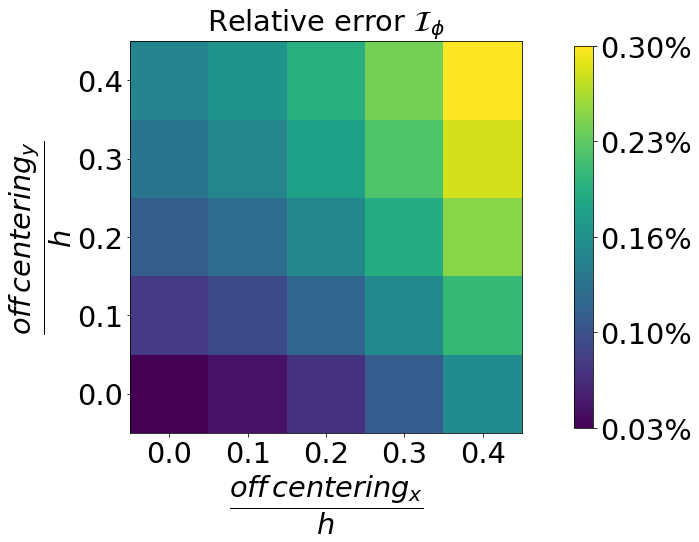

In [10]:
err=np.abs((I-FEM)/FEM)[:,::-1]*100 #in percentage
tickss=np.linspace(np.min(err), np.max(err),5)


im=plt.imshow(err, extent=extent,origin='lower')
plt.xticks(off)
plt.yticks(off)
plt.xlabel('$\dfrac{off \, centering_x}{h}$')
plt.ylabel('$\dfrac{off \, centering_y}{h}$')

plt.title('Relative error $\mathcal{I}_{\phi}$')

cbar = plt.colorbar(shrink=0.6, pad=0.1, ticks=tickss, format=ticker.PercentFormatter(decimals=2))
#plt.savefig(directory_script + '/Interpolation_matrix.pdf')
#plt.savefig(directory_article_figures +'/Single_source/Off_center/errs_interp.pdf',bbox_inches='tight')




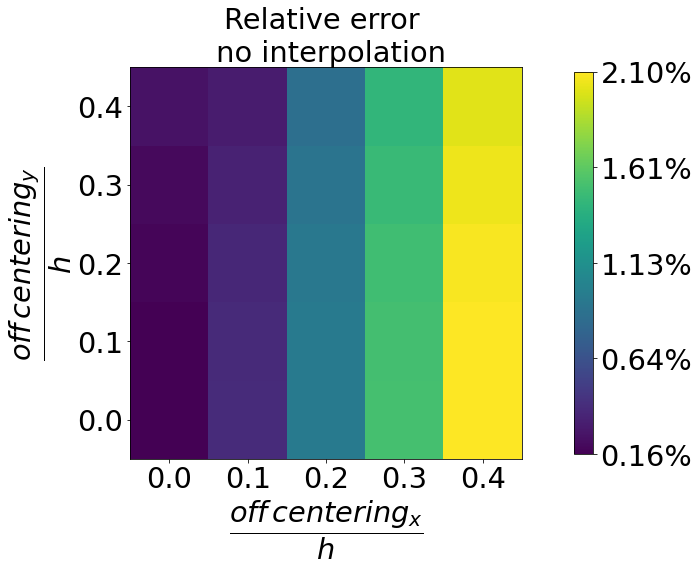

In [11]:
err=np.abs((no_I-FEM)/FEM)*100 #in percentage
tickss=np.linspace(np.min(err), np.max(err),5)


im=plt.imshow(err, extent=extent,origin='lower')
plt.xticks(off)
plt.yticks(off)
plt.xlabel('$\dfrac{off \, centering_x}{h}$')
plt.ylabel('$\dfrac{off \, centering_y}{h}$')

plt.title('Relative error \n no interpolation')

cbar = plt.colorbar(shrink=0.6, pad=0.1, ticks=tickss, format=ticker.PercentFormatter(decimals=2))
#plt.savefig(directory_script + '/No_interpolation_matrix.pdf')
#plt.savefig(directory_article_figures +'/Single_source/Off_center/errs_no_interp.pdf',bbox_inches='tight')
